[INFO] Epochs = 50
[INFO] Using device: cuda


Overall progress:   0%|          | 0/20 [00:00<?, ?rep/s]

[INFO] rep 0 saved: ./reps_sim_dat/x_rep0.csv, ./reps_sim_dat/y_rep0.csv


[INFO] Best penalty=0.1


Overall progress:   5%|▌         | 1/20 [08:13<2:36:17, 493.56s/rep]

[INFO] rep 1 saved: ./reps_sim_dat/x_rep1.csv, ./reps_sim_dat/y_rep1.csv


[INFO] Best penalty=1


Overall progress:  10%|█         | 2/20 [16:18<2:26:28, 488.27s/rep]

[INFO] rep 2 saved: ./reps_sim_dat/x_rep2.csv, ./reps_sim_dat/y_rep2.csv


[INFO] Best penalty=0.5


Overall progress:  15%|█▌        | 3/20 [24:19<2:17:29, 485.28s/rep]

[INFO] rep 3 saved: ./reps_sim_dat/x_rep3.csv, ./reps_sim_dat/y_rep3.csv


[INFO] Best penalty=0.1


Overall progress:  20%|██        | 4/20 [32:32<2:10:07, 488.00s/rep]

[INFO] rep 4 saved: ./reps_sim_dat/x_rep4.csv, ./reps_sim_dat/y_rep4.csv


[INFO] Best penalty=0.1


Overall progress:  25%|██▌       | 5/20 [40:47<2:02:39, 490.63s/rep]

[INFO] rep 5 saved: ./reps_sim_dat/x_rep5.csv, ./reps_sim_dat/y_rep5.csv


[INFO] Best penalty=1


Overall progress:  30%|███       | 6/20 [48:35<1:52:41, 482.94s/rep]

[INFO] rep 6 saved: ./reps_sim_dat/x_rep6.csv, ./reps_sim_dat/y_rep6.csv


[INFO] Best penalty=0.1


Overall progress:  35%|███▌      | 7/20 [1:03:18<2:12:58, 613.70s/rep]

[INFO] rep 7 saved: ./reps_sim_dat/x_rep7.csv, ./reps_sim_dat/y_rep7.csv


[INFO] Best penalty=0.5


Overall progress:  40%|████      | 8/20 [1:16:23<2:13:39, 668.26s/rep]

[INFO] rep 8 saved: ./reps_sim_dat/x_rep8.csv, ./reps_sim_dat/y_rep8.csv


[INFO] Best penalty=0.5


Overall progress:  45%|████▌     | 9/20 [1:34:20<2:25:55, 795.97s/rep]

[INFO] rep 9 saved: ./reps_sim_dat/x_rep9.csv, ./reps_sim_dat/y_rep9.csv


[INFO] Best penalty=0.1


Overall progress:  50%|█████     | 10/20 [1:48:37<2:15:49, 814.92s/rep]

[INFO] rep 10 saved: ./reps_sim_dat/x_rep10.csv, ./reps_sim_dat/y_rep10.csv


[INFO] Best penalty=0.5


Overall progress:  55%|█████▌    | 11/20 [2:08:05<2:18:26, 922.89s/rep]

[INFO] rep 11 saved: ./reps_sim_dat/x_rep11.csv, ./reps_sim_dat/y_rep11.csv


[INFO] Best penalty=0.5


Overall progress:  60%|██████    | 12/20 [2:27:08<2:11:58, 989.80s/rep]

[INFO] rep 12 saved: ./reps_sim_dat/x_rep12.csv, ./reps_sim_dat/y_rep12.csv


[INFO] Best penalty=0.1


Overall progress:  65%|██████▌   | 13/20 [2:46:12<2:00:56, 1036.58s/rep]

[INFO] rep 13 saved: ./reps_sim_dat/x_rep13.csv, ./reps_sim_dat/y_rep13.csv


[INFO] Best penalty=0.1


Overall progress:  70%|███████   | 14/20 [3:06:05<1:48:23, 1083.94s/rep]

[INFO] rep 14 saved: ./reps_sim_dat/x_rep14.csv, ./reps_sim_dat/y_rep14.csv


[INFO] Best penalty=0.1


Overall progress:  75%|███████▌  | 15/20 [3:15:52<1:17:50, 934.14s/rep] 

[INFO] rep 15 saved: ./reps_sim_dat/x_rep15.csv, ./reps_sim_dat/y_rep15.csv


[INFO] Best penalty=0.1


Overall progress:  80%|████████  | 16/20 [3:24:23<53:46, 806.68s/rep]  

[INFO] rep 16 saved: ./reps_sim_dat/x_rep16.csv, ./reps_sim_dat/y_rep16.csv


[INFO] Best penalty=0.5


Overall progress:  85%|████████▌ | 17/20 [3:43:12<45:11, 903.73s/rep]

[INFO] rep 17 saved: ./reps_sim_dat/x_rep17.csv, ./reps_sim_dat/y_rep17.csv


[INFO] Best penalty=0.5


Overall progress:  90%|█████████ | 18/20 [4:04:55<34:07, 1023.65s/rep]

[INFO] rep 18 saved: ./reps_sim_dat/x_rep18.csv, ./reps_sim_dat/y_rep18.csv


[INFO] Best penalty=1


Overall progress:  95%|█████████▌| 19/20 [4:21:44<16:59, 1019.33s/rep]

[INFO] rep 19 saved: ./reps_sim_dat/x_rep19.csv, ./reps_sim_dat/y_rep19.csv


[INFO] Best penalty=0.5


Overall progress: 100%|██████████| 20/20 [4:26:20<00:00, 799.02s/rep] 



[INFO] Saved all results to ./exp_results.pkl


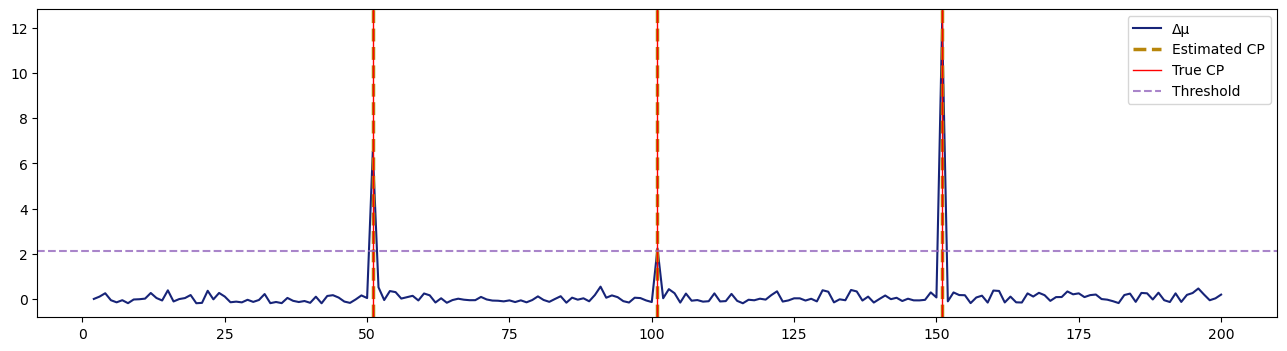

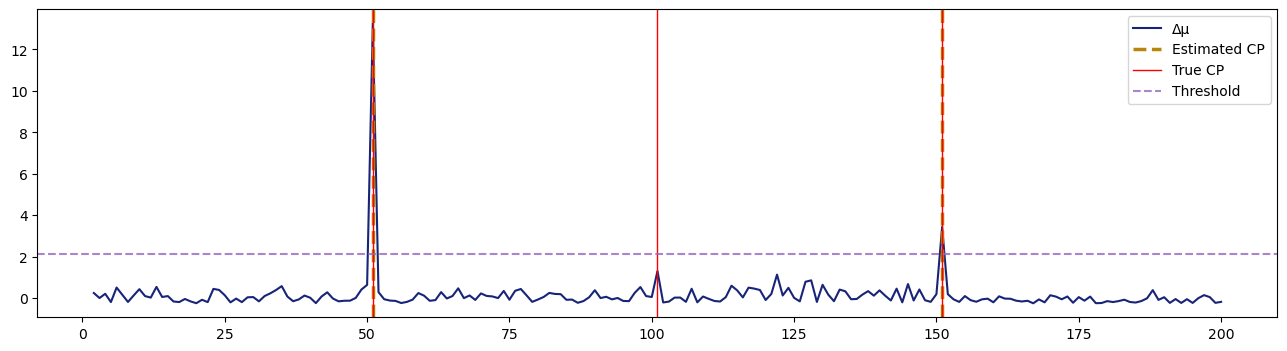

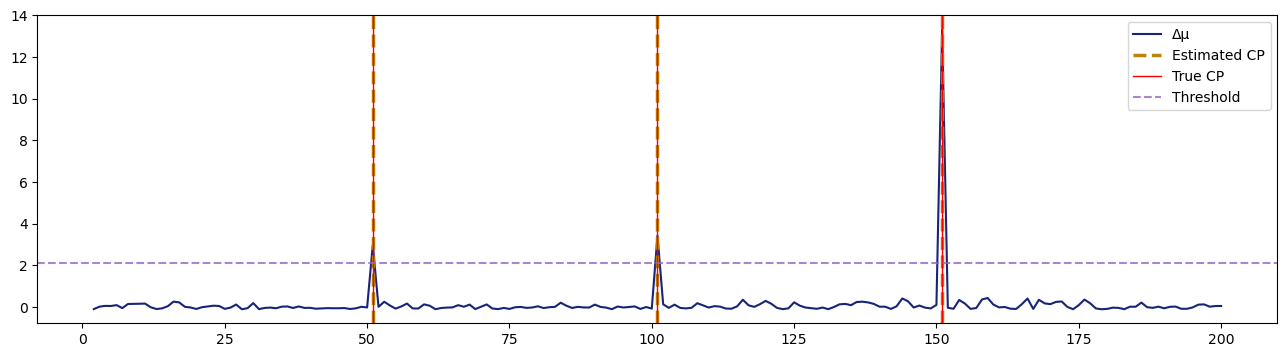

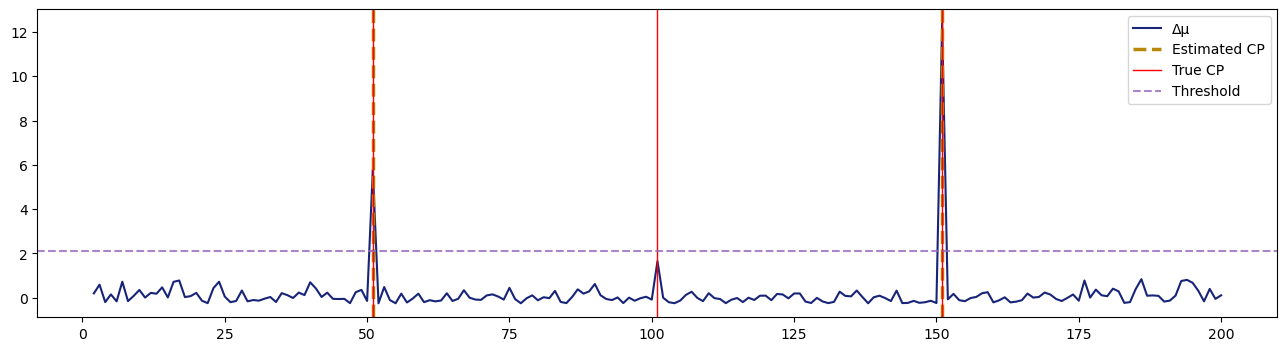

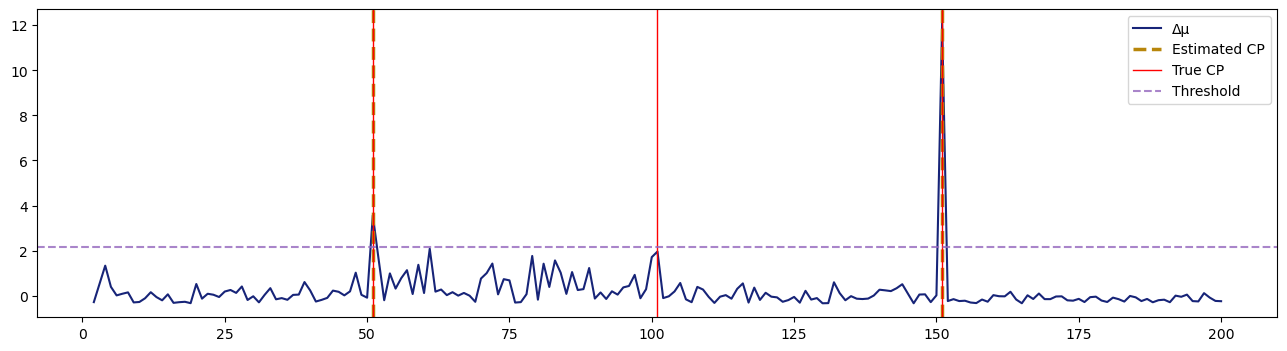

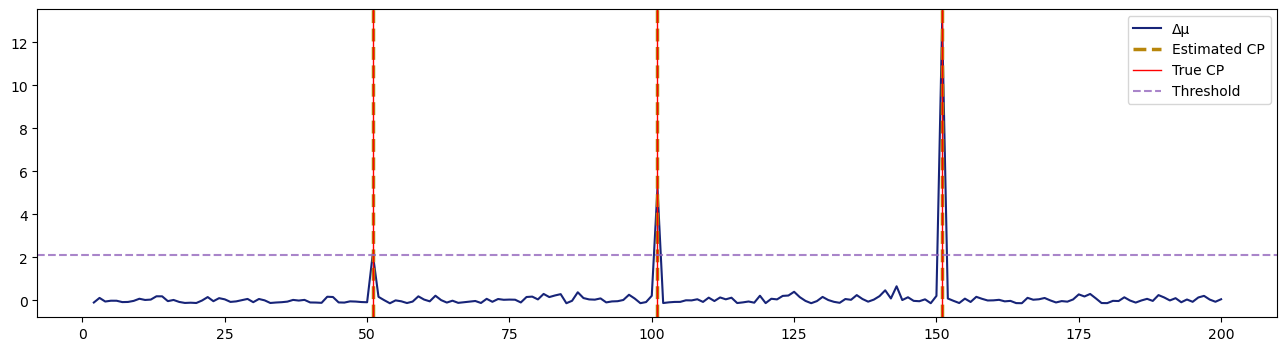

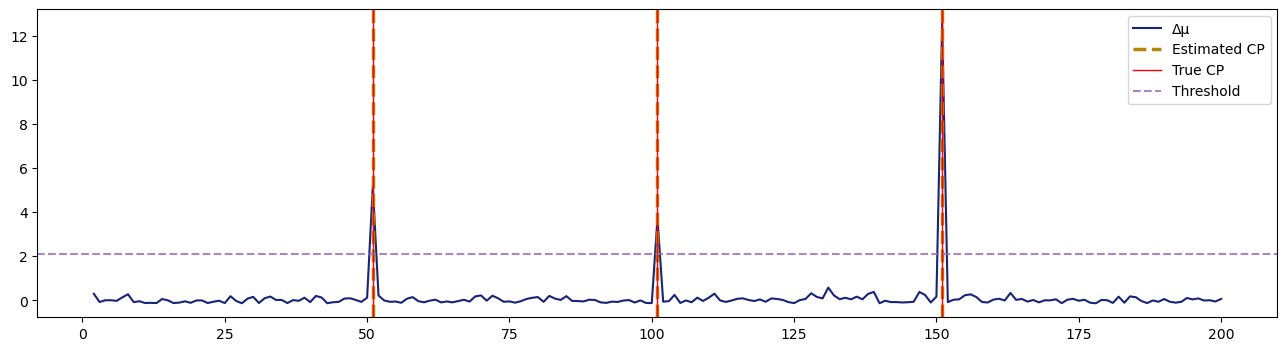

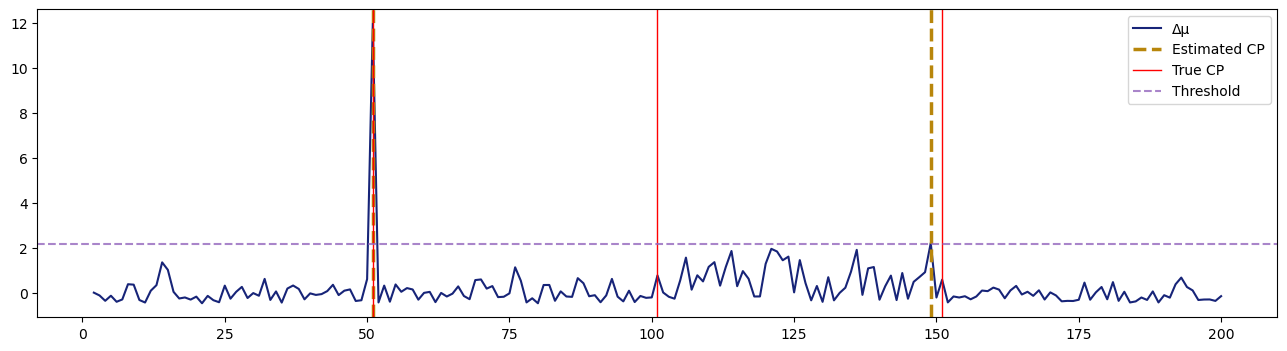

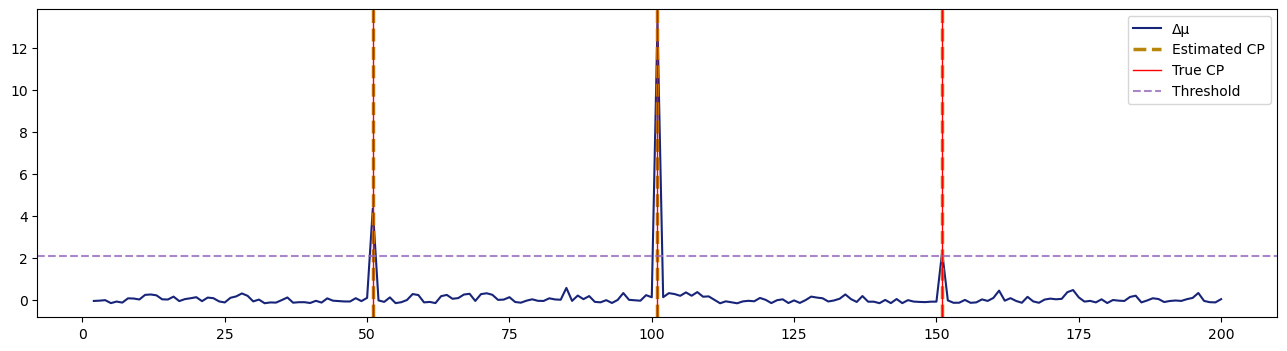

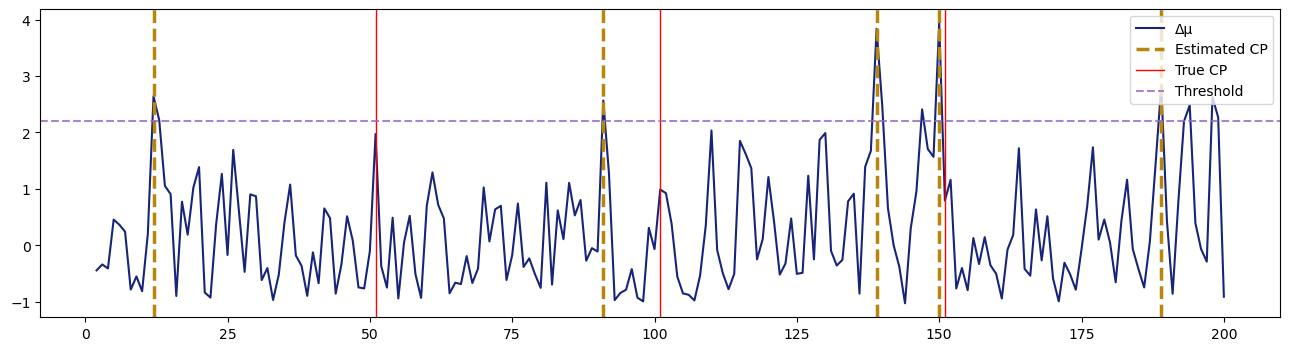

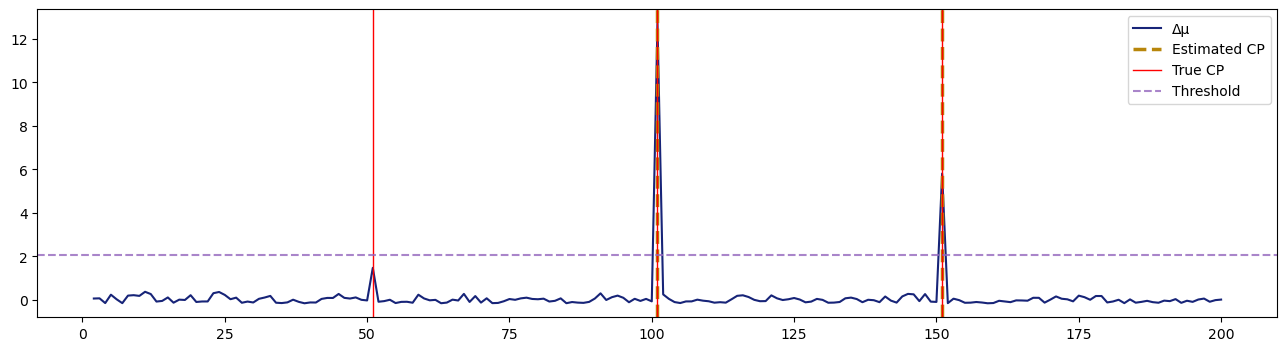

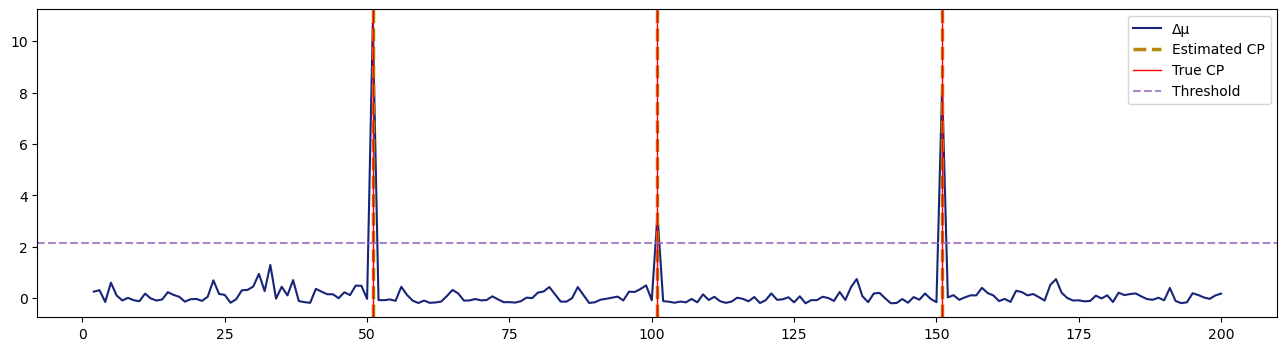

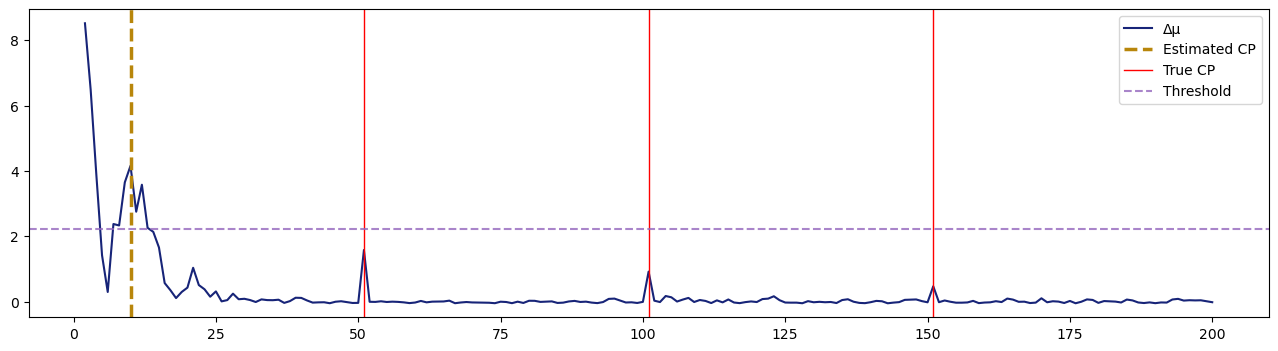

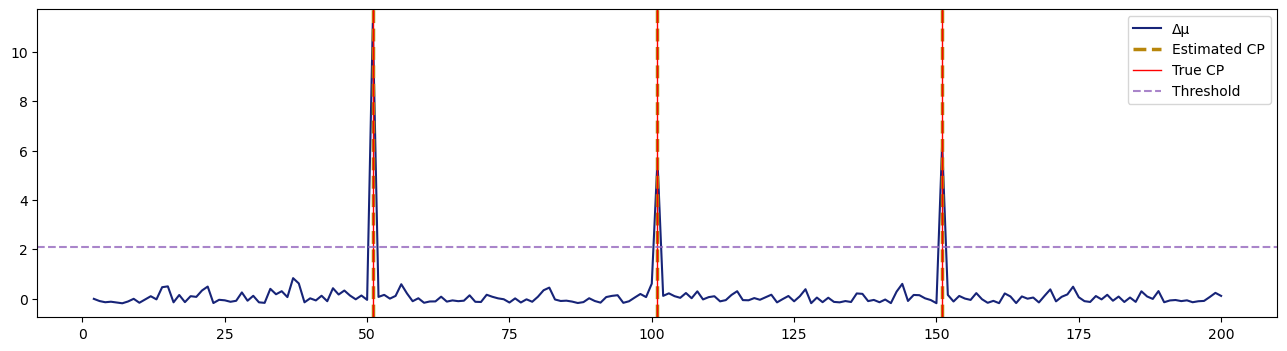

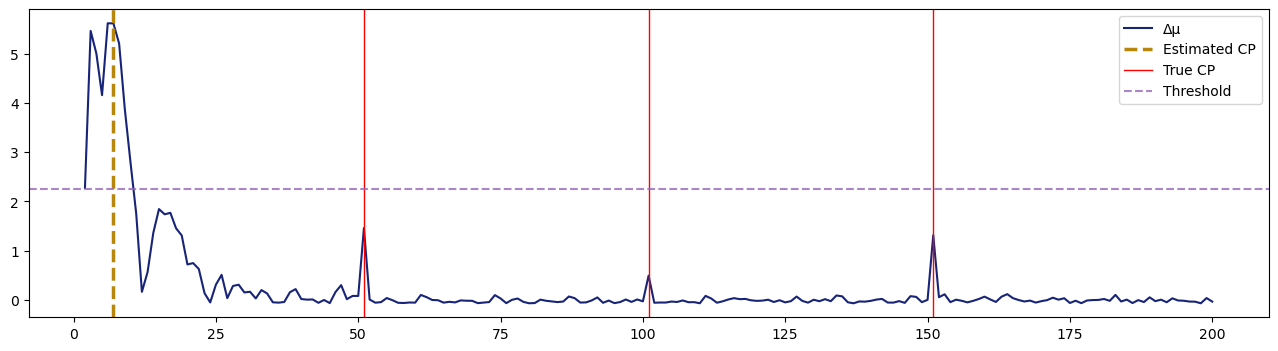

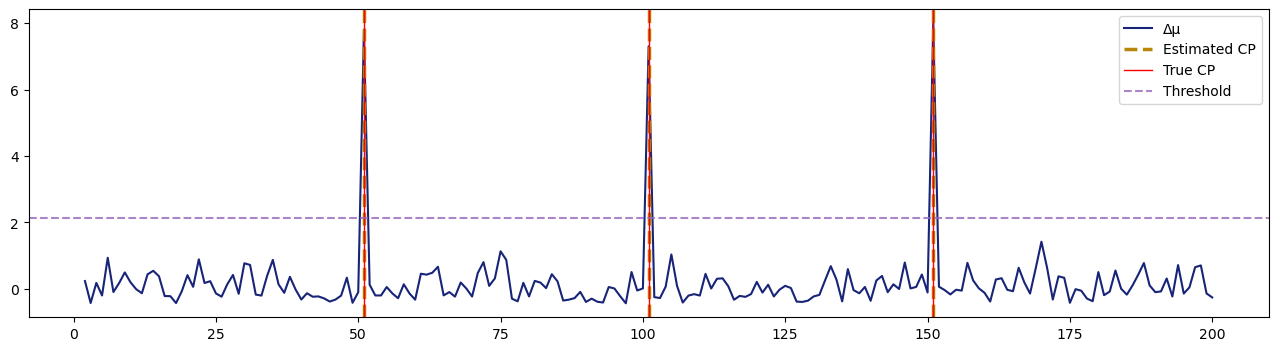

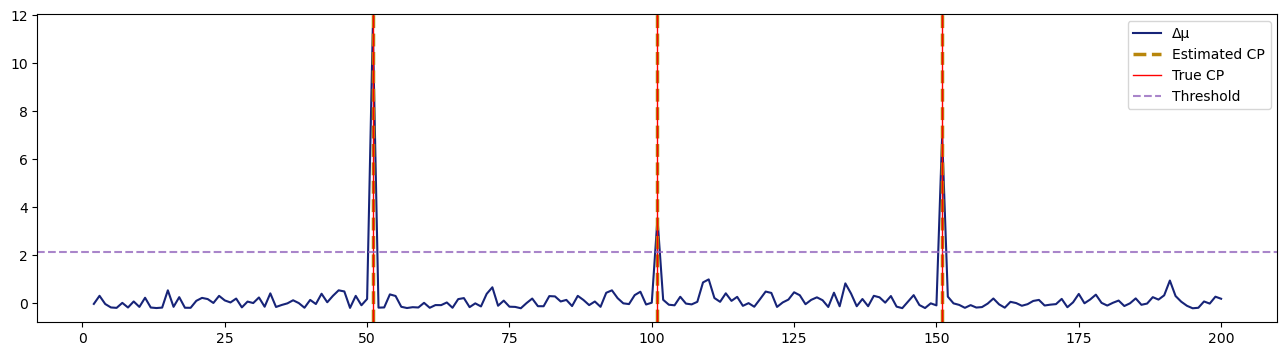

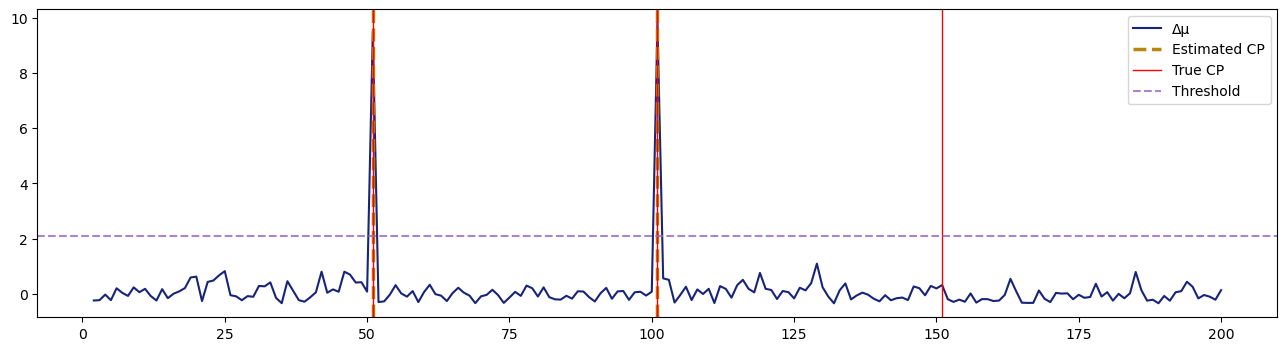

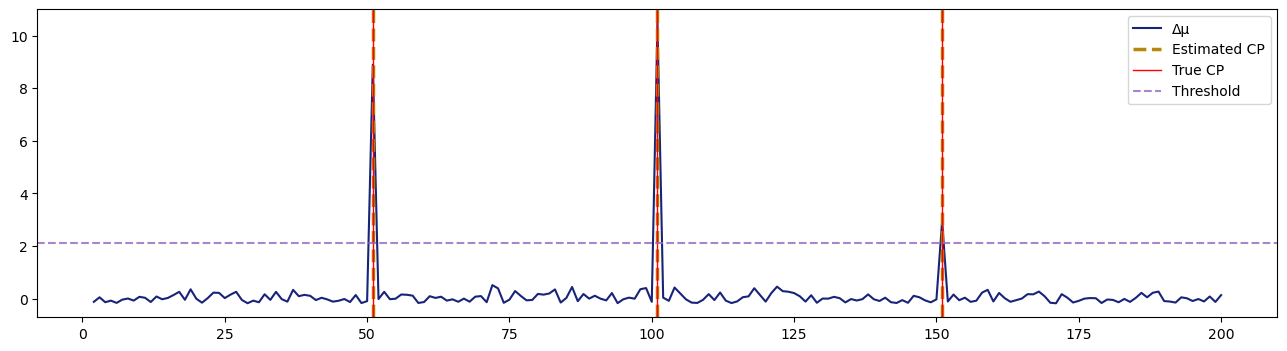

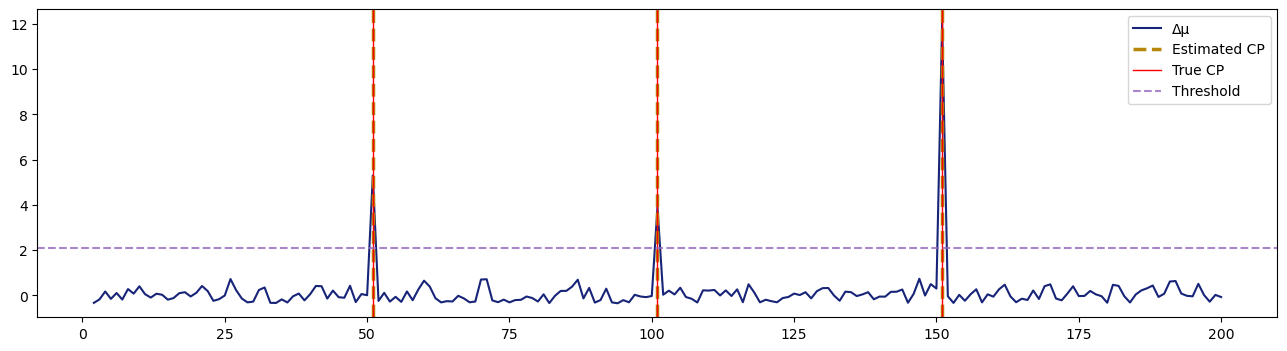

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
import numpy as np
import pandas as pd
import os
from tqdm import tqdm  
from cpd_model import parse_args, learn_one_seq_penalty
from simulation_data_3cp import generate_x, generate_data

# ===== Global random coefficient vectors =====
u = np.random.randn(6) + 1
v = np.random.randn(6) + 2
w = np.random.randn(6) - 1
d = np.random.randn(6) - 2


# ===== Mean and variance functions for each mixture component =====
def mean_func_1(h, z):
    return np.array([
        np.tanh(h @ u) + z[0],
        np.sin(h @ v) + z[1],
        0.5 * (h @ w) - z[2]
    ])

def mean_func_2(h, z):
    return np.array([
        np.tanh(h @ u) + z[0] + 5,
        np.sin(h @ v) - z[1] + 5,
        0.5 * (h @ w) + z[2] + 5
    ])

def mean_func_3(h, z):
    return np.array([
        np.tanh(h @ u) - z[0] - 5,
        np.sin(h @ v) + z[1] - 5,
        0.5 * (h @ w) + z[2] - 5
    ])

def sigma_func(h, z, dy=3):
    """Return heteroskedastic noise level based on h and z."""
    val = 0.1 * abs(h @ d) + 0.01 * abs(z[0])
    sigma = 0.1 + 0.1 * np.tanh(val) + abs(z[0]) * 0.5
    return sigma * np.ones(dy)


# ===== Main experiment runner =====
def run_multiple_experiments(n_repeats=20, save_path="./exp_results.pkl"):
    save_dir = "./reps_sim_dat"
    args = parse_args()
    print(f"[INFO] Epochs = {args.epoch}")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("[INFO] Using device:", device)

    all_results = []

    # ===== Outer loop (with progress bar over all replicates) =====
    for rep in tqdm(range(n_repeats), desc="Overall progress", unit="rep"):
        np.random.seed(rep)

        # Mixture setup: 3 components with different mean functions
        mixture_sizes = [50, 30, 20]
        mean_funcs = [mean_func_1, mean_func_2, mean_func_3]
        z_means_local = np.random.normal(0, 2, 4)
        z_means_local[1:] = np.where(
            np.abs(np.diff(z_means_local)) < 2,
            z_means_local[:-1] + np.sign(np.random.randn(3)) * (0.8 + np.abs(np.random.randn(3))*0.5),
            z_means_local[1:]
        )
        X_blocks, Y_blocks, Z_blocks = [], [], []

        # ---- Generate each mixture component ----
        for func, Nk in zip(mean_funcs, mixture_sizes):
            X_part = generate_x(args.num_time, Nk, args.x_dim)
        
            X_seg, Y_seg, Z_seg = generate_data(
                X_part, func, lambda h, z: sigma_func(h, z, int(args.y_dim)),
                change_points=[50, 100, 150],
                z_means=z_means_local
            )
            X_blocks.append(X_seg)
            Y_blocks.append(Y_seg)
            Z_blocks.append(Z_seg)

        # ---- Concatenate all components ----
        X_array = np.concatenate(X_blocks, axis=1)
        Y_array = np.concatenate(Y_blocks, axis=1)
        Z_array = np.concatenate(Z_blocks, axis=1)

        # ---- Save simulated data ----
        os.makedirs(save_dir, exist_ok=True)
        x_path = f"{save_dir}/x_rep{rep}.csv"
        y_path = f"{save_dir}/y_rep{rep}.csv"
        pd.DataFrame(X_array.reshape(-1, args.x_dim)).to_csv(x_path, index=False)
        pd.DataFrame(Y_array.reshape(-1, args.y_dim)).to_csv(y_path, index=False)
        print(f"[INFO] rep {rep} saved: {x_path}, {y_path}")

        # ---- Normalize X ----
        X_flat = X_array.reshape(-1, args.x_dim)
        X_mean = X_flat.mean(axis=0, keepdims=True)
        X_std  = X_flat.std(axis=0, keepdims=True) + 1e-8
        X_flat = (X_flat - X_mean) / X_std

        total_samples = sum(mixture_sizes)
        X_array = X_flat.reshape(args.num_time, total_samples, args.x_dim)

        # ---- Convert to torch tensors ----
        x_input = torch.tensor(X_array, dtype=torch.float32).to(device)
        y_input = torch.tensor(Y_array.reshape(args.num_time, total_samples, args.y_dim),
                                dtype=torch.float32).to(device)

        # ---- Split into training and testing (odd/even time indices) ----
        odd_idx, even_idx = range(1, args.num_time, 2), range(0, args.num_time, 2)
        x_train, x_test = x_input[odd_idx].reshape(-1, args.x_dim), x_input[even_idx].reshape(-1, args.x_dim)
        y_train, y_test = y_input[odd_idx].reshape(-1, args.y_dim), y_input[even_idx].reshape(-1, args.y_dim)

        # ---- Grid search over penalties (inner progress bar) ----
        results_half = []
        for penalty in tqdm(args.penalties, desc=f"rep {rep+1} penalties", leave=False):
            loss, pen = learn_one_seq_penalty(args, x_train, y_train, x_test, y_test,
                                              penalty=penalty, half=True)
            results_half.append([loss, pen])
        results_half = np.array(results_half)

        # ---- Choose best penalty ----
        best_idx = np.argmin(results_half[:, 0])
        best_penalty = args.penalties[best_idx]
        print(f"[INFO] Best penalty={best_penalty}")

        # ---- Run full model with best penalty ----
        res_full = learn_one_seq_penalty(
            args,
            x_input.reshape(-1, args.x_dim),
            y_input.reshape(-1, args.y_dim),
            x_input.reshape(-1, args.x_dim),
            y_input.reshape(-1, args.y_dim),
            penalty=best_penalty,
            half=False
        )

        all_results.append({
            "rep": rep,
            "results_half": results_half.tolist(),
            "best_penalty": best_penalty,
            "res_full": res_full
        })

    # ===== Save all results =====
    df_results = pd.DataFrame(all_results)
    df_results.to_pickle(save_path)
    print(f"\n[INFO] Saved all results to {save_path}")
    return df_results

res = run_multiple_experiments(n_repeats=20)


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_mixture_grid_3d(Y_array, mixture_sizes=[50, 30, 20], t_list=None):
    """
    Plot 3D scatter of Y at multiple time indices in a 2x5 grid.

    Parameters
    ----------
    Y_array : np.ndarray
        shape (T, N, 3)
    mixture_sizes : list[int]
        number of samples in each mixture component
    t_list : list[int]
        which time indices to plot
    """
    if t_list is None:
        t_list = list(range(20, 201, 20))  # 20,40,...,200

    colors = ["tab:blue", "tab:orange", "tab:green"]
    labels = np.concatenate([
        np.zeros(mixture_sizes[0], dtype=int),
        np.ones(mixture_sizes[1], dtype=int),
        np.full(mixture_sizes[2], 2, dtype=int)
    ])

    fig = plt.figure(figsize=(18, 8))
    for i, t in enumerate(t_list):
        ax = fig.add_subplot(2, 5, i + 1, projection="3d")
        start = 0
        for k, Nk in enumerate(mixture_sizes):
            end = start + Nk
            ax.scatter(
                Y_array[t - 1, start:end, 0],
                Y_array[t - 1, start:end, 1],
                Y_array[t - 1, start:end, 2],
                color=colors[k],
                alpha=0.7,
                s=15,
                label=f"Comp {k+1}" if i == 0 else None,
            )
            start = end
        ax.set_title(f"t = {t}", fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        if i == 0:
            ax.legend(loc="upper right", fontsize=8)

    fig.suptitle("Mixture structure of Y over time", fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


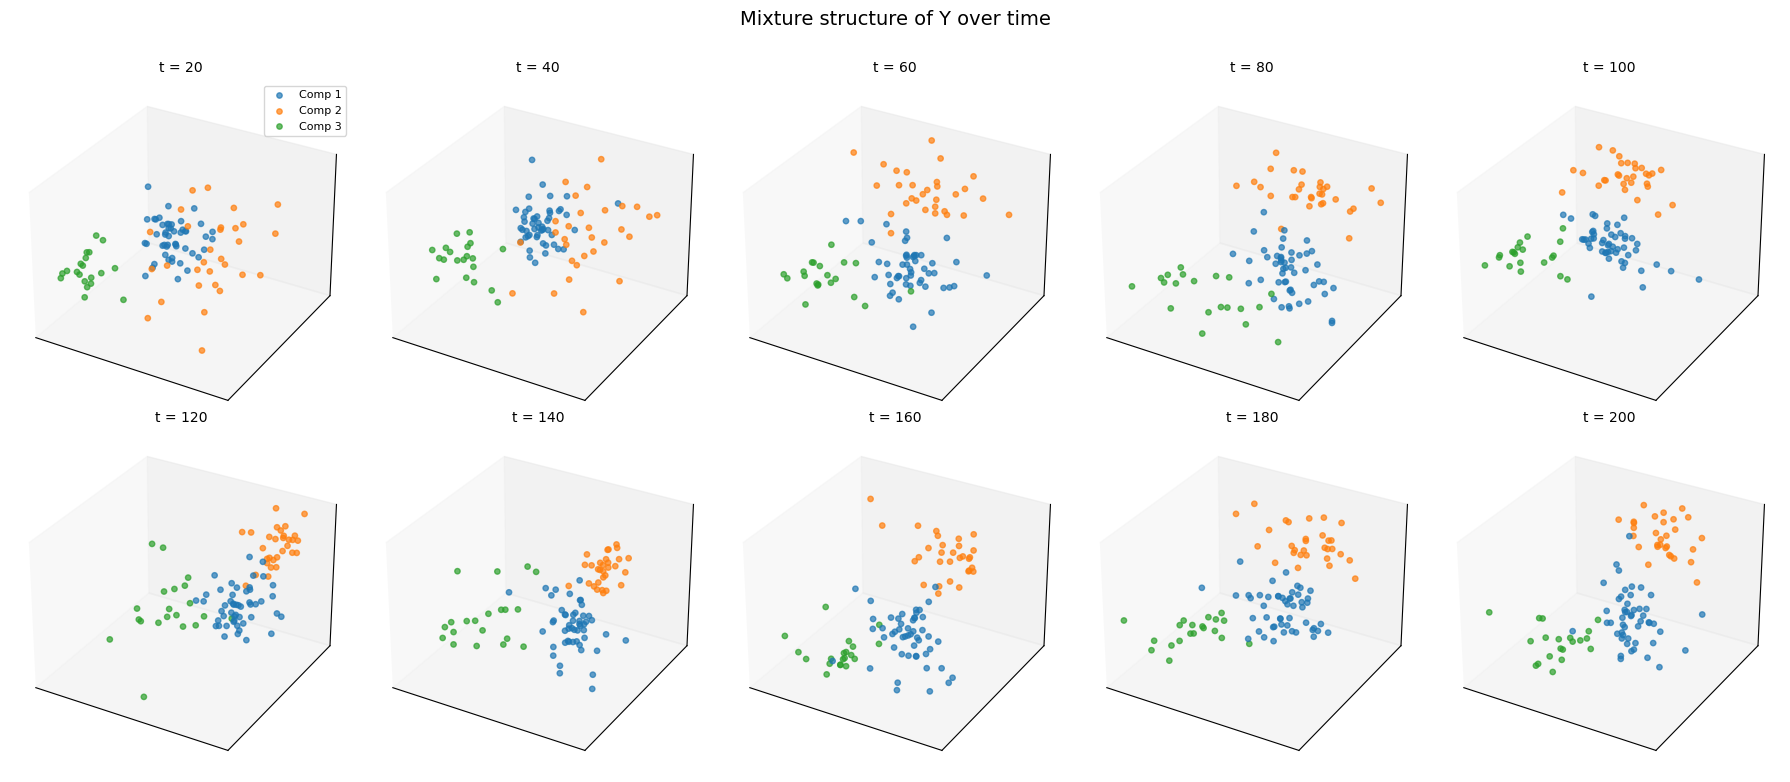

In [9]:
Y_flat = pd.read_csv("./reps_sim_dat/y_rep0.csv").values
Y_array = Y_flat.reshape(200, 100, 3)
visualize_mixture_grid_3d(Y_array, mixture_sizes=[50, 30, 20])


In [10]:
import matplotlib.pyplot as plt

def visualize_traceplots(Y_array, mixture_sizes=[50, 30, 20], n_per_comp=2):
    """
    Plot traceplots of Y1, Y2, Y3 for a few samples in each mixture component.

    Parameters
    ----------
    Y_array : np.ndarray
        shape (T, N, 3)
    mixture_sizes : list[int]
        number of samples in each mixture component
    n_per_comp : int
        number of traces to plot per component
    """
    T, N, dy = Y_array.shape
    assert dy == 3, "This function assumes Y has 3 dimensions."

    comp_colors = ["tab:blue", "tab:orange", "tab:green"]   # color for component labels
    line_colors = ["red", "green", "black"]                 # color for y1, y2, y3
    comp_names = [f"Component {i+1}" for i in range(len(mixture_sizes))]

    # Compute start/end indices for each component
    comp_bounds = np.cumsum([0] + mixture_sizes)

    fig, axes = plt.subplots(3, 2, figsize=(12, 8), sharex=True)
    axes = axes.flatten()

    plot_idx = 0
    for k, (start, end) in enumerate(zip(comp_bounds[:-1], comp_bounds[1:])):
        idxs = np.random.choice(np.arange(start, end), size=n_per_comp, replace=False)
        for j, n in enumerate(idxs):
            ax = axes[plot_idx]
            for d in range(dy):
                ax.plot(np.arange(T), Y_array[:, n, d],
                        label=f"Y{d+1}" if (k==0 and j==0) else "",
                        color=line_colors[d], alpha=0.8)
            ax.set_title(f"{comp_names[k]} – Sample {j+1}", fontsize=10, color=comp_colors[k])
            ax.grid(True, linestyle="--", alpha=0.4)
            plot_idx += 1

    for ax in axes:
        ax.set_xlabel("Time")
        ax.set_ylabel("Y value")

    # add legend once
    axes[0].legend(loc="upper right", fontsize=8)
    fig.suptitle("Traceplots of Y1, Y2, Y3 for samples from each mixture component", fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()


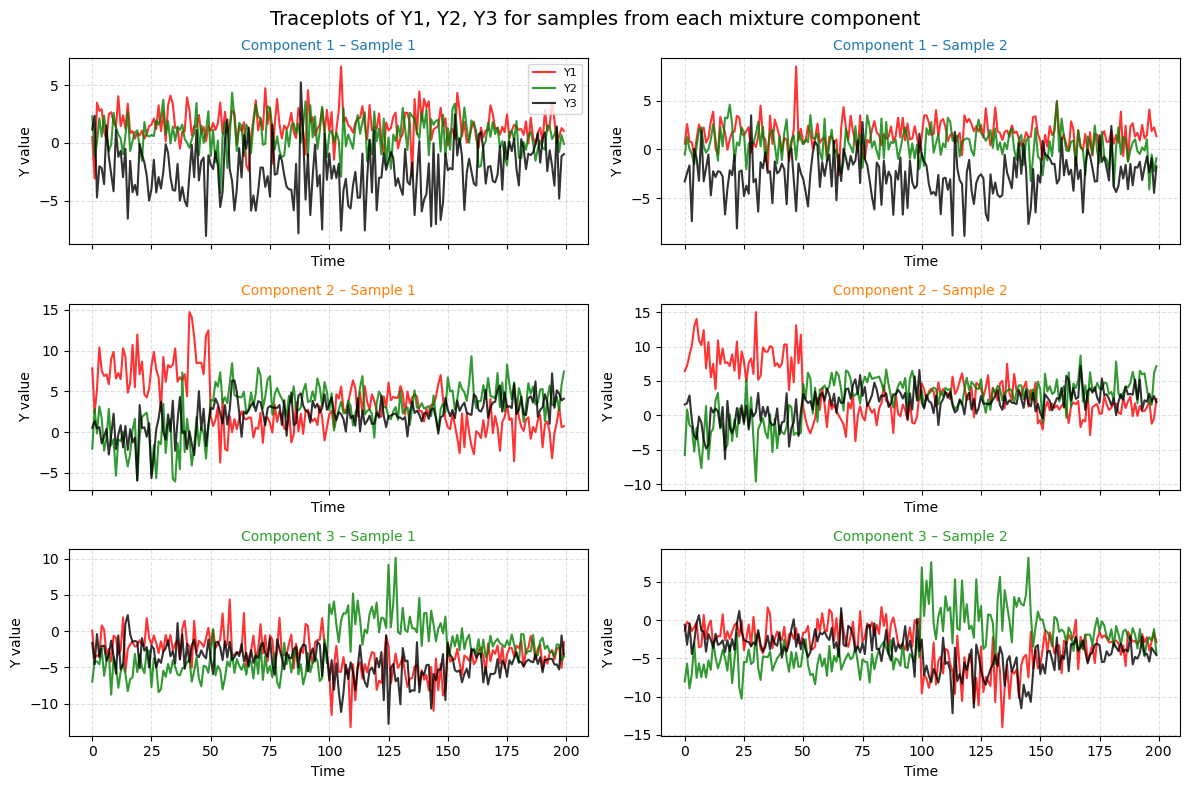

In [11]:
visualize_traceplots(Y_array)


In [3]:
import numpy as np

for rep in range(20):
    np.random.seed(rep)
    print(f"\nRep {rep}:")
    z_means_local = np.random.normal(0, 2, 4)
    z_means_local[1:] = np.where(
        np.abs(np.diff(z_means_local)) < 1.5,
        z_means_local[:-1] + np.sign(np.random.randn(3)) * (0.8 + np.abs(np.random.randn(3))*0.5),
        z_means_local[1:]
    )
    print(f": z_means_local = {z_means_local}")



Rep 0:
: z_means_local = [ 3.52810469  0.80031442 -0.05129501  4.4817864 ]

Rep 1:
: z_means_local = [ 3.24869073 -1.22351283 -2.18303238 -0.13165832]

Rep 2:
: z_means_local = [-0.83351569 -2.25615974 -4.27239219  3.28054162]

Rep 3:
: z_means_local = [ 3.57725695  0.8730197   0.05111062 -3.72698541]

Rep 4:
: z_means_local = [ 0.10112341 -0.99816417 -1.99181786  1.38719702]

Rep 5:
: z_means_local = [ 0.88245497 -0.6617403   4.86154237 -0.50418426]

Rep 6:
: z_means_local = [-0.62356735  1.45800785  3.07765339 -1.79818359]

Rep 7:
: z_means_local = [ 3.38105141 -0.93187474  0.37695426 -1.03460893]

Rep 8:
: z_means_local = [ 0.18240943  2.18256547 -3.89394062 -2.60573007]

Rep 9:
: z_means_local = [ 2.21710942e-03 -1.04321888e+00 -2.23213261e+00 -2.57655135e-02]

Rep 10:
: z_means_local = [ 2.66317301  3.51744727 -3.09080058 -0.0167677 ]

Rep 11:
: z_means_local = [ 3.49890948 -0.57214599 -1.58267135 -5.30663712]

Rep 12:
: z_means_local = [ 0.94597166 -1.36285176  0.48487899 -3.401